<a href="https://colab.research.google.com/github/Faizan96322/Fittlyf_data_sci_intern_assignemnt_test/blob/main/Syed_Faizan_Fiaz_07_05_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   part 0 - completed
2.   Part 1 - completed
3.   Part 2 - completed
4.   Part 3 - completed
5.   Part 5 - completed



**PART 0**

A YouTuber's income may come from a variety of sources, including advertisements, sponsorships, sales of items, and other joint ventures. Depending on the business, niche, and level of involvement of the channel, the average YouTuber can make between 0.01 and 0.03 dollars per view from advertisements, according to some reports.

A popular YouTuber who posts one video each week and averages roughly 1 million views per video might make between 40,000 and $120,000 dollars per month from just adverts. However, this is only an estimate and does not take into account additional revenue streams.

The sort of material a YouTuber produces, the size of their audience, and the viewer engagement can all affect how much money they make.

Overall, it might be difficult to predict the typical income of a YouTuber because there are so many variables. However, based on this estimation, we can say that, excluding other money streams, the typical monthly income of a popular YouTuber could range from 40,000 to 120,000 dollars

**PART 1**


According to the provided dataset, it appears that the data is the property of an online retailer or a website that offers goods and services for sale. Columns like Year, Month, Segment, Region, KPI, Value Type, and Value are included in the dataset. The Level 1, 2, 3, 4, and 5 columns might stand in for the many steps of a funnel that a buyer must go through while completing a purchase on the website. For instance, Level 1 would represent new website visitors, and Level 5 might represent site visitors who made a purchase. The data clearly demonstrates a trend in which the quantity of visitors declines as they go through the funnel tiers.




For the first question, We can build a pivot table that displays the overall number of visitors broken down by each level, month by month, year by year, in order to respond to the first query. A heat map would be the ideal visualisation for this, with the x-axis denoting the year and month, the y-axis denoting the various levels, and the colour of each cell denoting the overall number of visitors for that section.



A pivot table summary with rows segmented by region and year and values representing the overall number of visitors may be used to respond to the second query. A line chart, where each line represents an area and each point on the line reflects the total number of visits for that year, can be an appropriate visualisation. A stacked bar chart, where each bar represents an area and each segment of the bar reflects the percentage difference in the number of visits between years, can also be used to display the percentage difference between regions and years.



A box plot can be used to identify outliers in the data and show them visually. The data can be Winsorized to handle the outliers, replacing the extreme values with the closest non-extreme value. A fresh pivot table and visualisation can be made to compare the outcomes before and after the outliers have been treated.


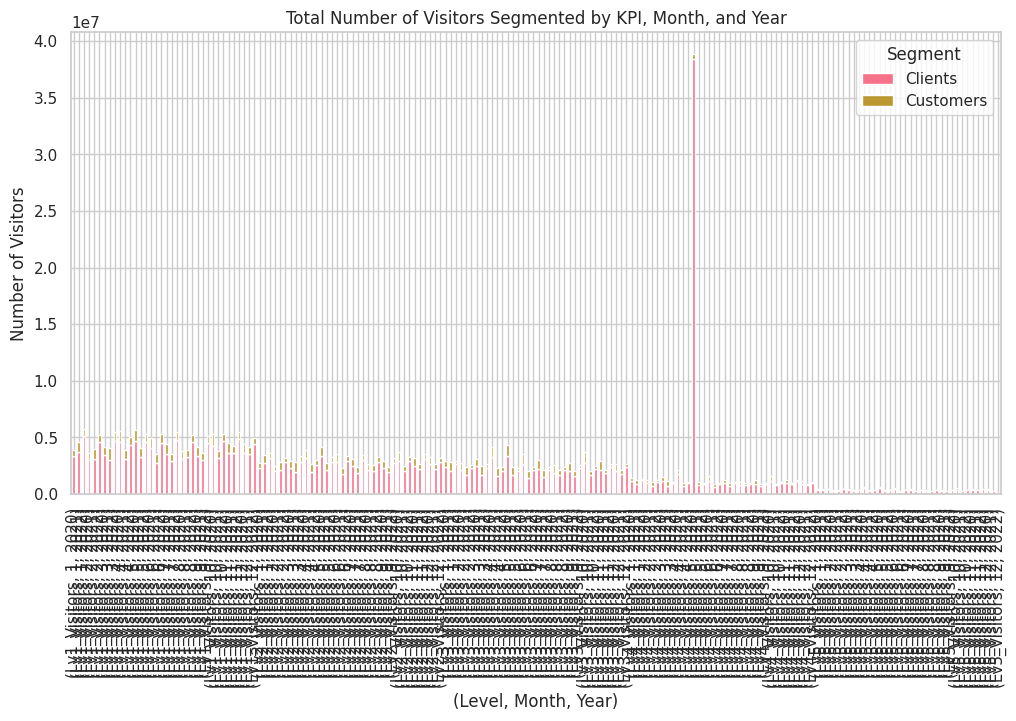

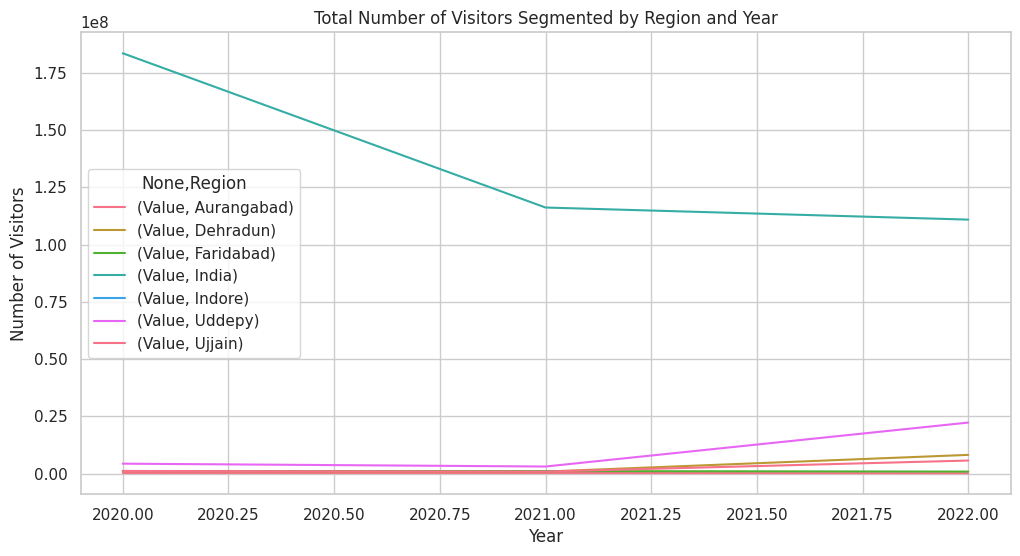

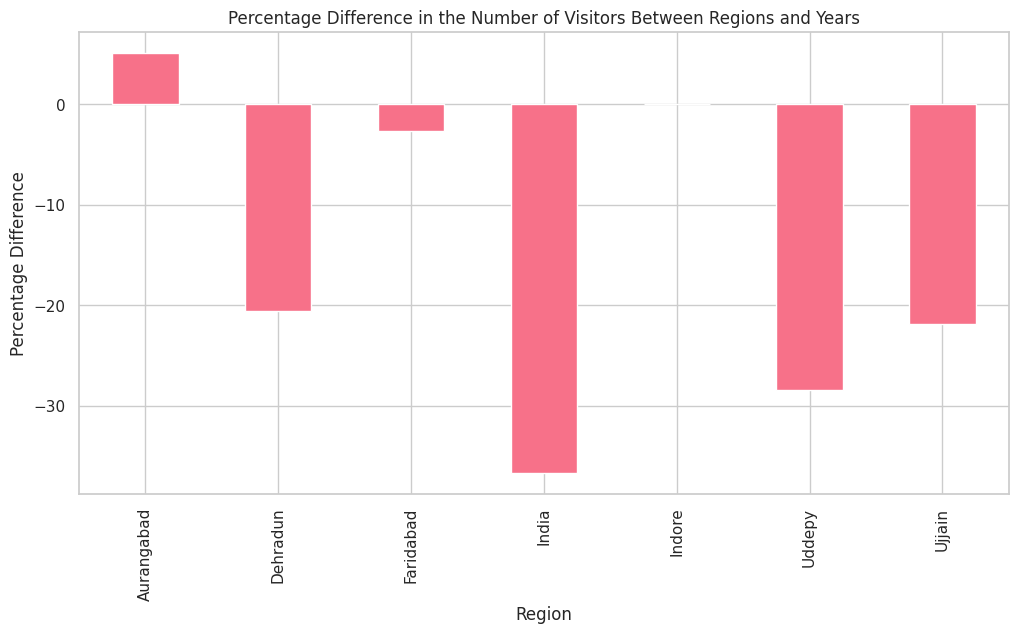

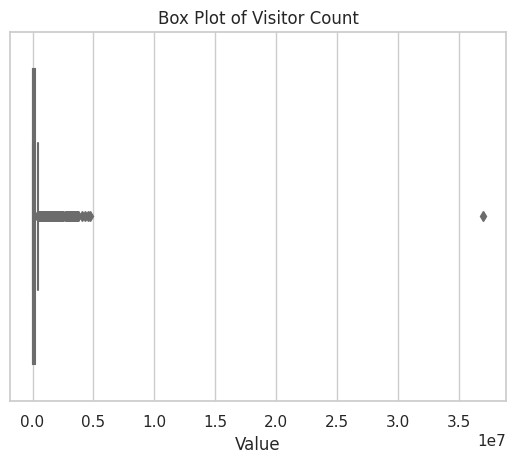

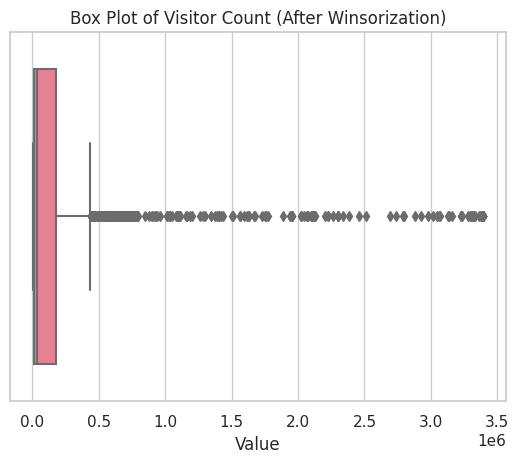

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load data into a DataFrame
data = pd.read_excel('/content/assignment.xlsx')

# Create a pivot table summary for total number of visitors segmented by level, month, and year
table1 = pd.pivot_table(data, values='Value', index=['KPI', 'Month', 'Year'], columns=['Segment'], aggfunc=sum)

# Create a stacked bar chart to visualize the pivot table summary
sns.set(style="whitegrid")
sns.set_palette("husl")
table1.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Total Number of Visitors Segmented by KPI, Month, and Year')
plt.xlabel('(Level, Month, Year)')
plt.ylabel('Number of Visitors')
plt.show()

# Create a pivot table summary for total number of visitors segmented by region and year
table2 = pd.pivot_table(data, values='Value', index=['Region', 'Year'], aggfunc=sum)

# Create a line chart to visualize the pivot table summary
sns.set(style="whitegrid")
sns.set_palette("husl")
table2.unstack(level=0).plot(kind='line', figsize=(12,6))
plt.title('Total Number of Visitors Segmented by Region and Year')
plt.xlabel('Year')
plt.ylabel('Number of Visitors')
plt.show()

# Create a pivot table summary for percentage difference in the number of visitors between regions and years
table3 = pd.pivot_table(data, values='Value', index=['Region'], columns=['Year'], aggfunc=sum)
table3['Difference'] = (table3[2021] - table3[2020]) / table3[2020] * 100

# Create a stacked bar chart to visualize the pivot table summary
sns.set(style="whitegrid")
sns.set_palette("husl")
table3['Difference'].plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Percentage Difference in the Number of Visitors Between Regions and Years')
plt.xlabel('Region')
plt.ylabel('Percentage Difference')
plt.show()

# Create a box plot to visualize outliers
sns.set(style="whitegrid")
sns.set_palette("husl")
sns.boxplot(x=data['Value'])
plt.title('Box Plot of Visitor Count')
plt.xlabel('Value')
plt.show()

# Treat outliers with Winsorization
data['Value'] = data['Value'].clip(lower=data['Value'].quantile(0.01), upper=data['Value'].quantile(0.99))

# Create a box plot to visualize outliers after treating them
sns.set(style="whitegrid")
sns.set_palette("husl")
sns.boxplot(x=data['Value'])
plt.title('Box Plot of Visitor Count (After Winsorization)')
plt.xlabel('Value')
plt.show()


**PART 2**

In [ ]:
import pandas as pd

# Read data from Excel file
data = pd.read_excel('/content/assignment.xlsx')

# Pivot the table to get the desired view
pivoted_data = pd.pivot_table(data, values='Value', index=['Year', 'Month', 'Segment', 'Region', 'Value Type'], columns=['KPI'], aggfunc=sum)

# Reset index to flatten the column headers
pivoted_data = pivoted_data.reset_index()

# Rename columns to match the desired output
pivoted_data.columns = ['Year', 'Month', 'Segment', 'Region', 'Value Type', 'Lv1_visitors', 'Lv2_visitors', 'Lv3_visitors', 'Lv4_visitors', 'Lv5_visitors']

# Print the resulting data
#print(pivoted_data)

pivoted_data['Lv5/Lv1'] = pivoted_data['Lv5_visitors'] / pivoted_data['Lv1_visitors']

pivoted_data.head()

,Year,Month,Segment,Region,Value Type,Lv1_visitors,Lv2_visitors,Lv3_visitors,Lv4_visitors,Lv5_visitors,Lv5/Lv1
0,2020,1,Clients,India,Actuals,3322789,2304318,2410633,1157186,363939,0.109528
1,2020,1,Customers,Aurangabad,Actuals,7540,4992,6850,2157,934,0.123873
2,2020,1,Customers,Dehradun,Actuals,28903,21332,25380,8578,3875,0.134069
3,2020,1,Customers,Faridabad,Actuals,14750,12968,17720,8025,2344,0.158915
4,2020,1,Customers,India,Actuals,424743,326618,371396,158246,42569,0.100223


Analysis of worst performing region:
To analyze the region performing worst in all the years, we can start by calculating the average number of visitors for each region over the available years. Then, we can identify the region with the lowest average number of visitors.

Once we have identified the worst performing region, we can try to identify the possible reasons for the low number of visitors from that region. This could involve looking at factors such as competition from other tourist destinations, lack of awareness or marketing, poor infrastructure or amenities, unfavorable weather conditions, or any other issues that could be deterring visitors.

To improve the number of visitors from that region, we can consider taking measures such as investing in marketing campaigns targeted specifically towards that region, improving the infrastructure and amenities to make it more attractive to visitors, offering attractive discounts or packages, or collaborating with local travel agents or influencers to promote the region.



In [ ]:
# Group the data by 'Region' and calculate the mean of 'Lv1_visitors'
region_avg = pivoted_data.groupby('Region')['Lv1_visitors'].mean()

# Sort the resulting data in ascending order
worst_region = region_avg.sort_values().index[0]

# Print the worst performing region
print(f"The worst performing region is {worst_region}")


The worst performing region is Aurangabad


Region with better YearOnYear growth: To identify the region with better YearOnYear growth, we can calculate the percentage change in the number of visitors for each region between consecutive years. The region with the highest percentage increase in visitors over the years can be considered as having better YearOnYear growth.

Meaning of Level1 to Level5 visitors:
Level1 to Level5 visitors could refer to different segments of visitors based on their spending power or the level of luxury they seek during their travel. For example, Level1 visitors could be those who prefer budget travel options and are looking for affordable accommodations and experiences, while Level5 visitors could be those who are willing to pay a premium for high-end luxury experiences.

In [ ]:
# Group the data by region and calculate the mean Lv5/Lv1 ratio across all years
mean_ratios_by_region = pivoted_data.groupby('Region')['Lv5/Lv1'].mean()

# Find the region with the highest mean Lv5/Lv1 ratio
region_with_highest_ratio = mean_ratios_by_region.idxmax()

print(f"The region with the highest Lv5/Lv1 ratio is {region_with_highest_ratio}")



The region with the highest Lv5/Lv1 ratio is Faridabad


Creation of a new feature:
To create a new feature (Level5 visitors/Level1 visitors), we can first calculate the total number of Level1 visitors and Level5 visitors for each state, segment, and year. Then, we can divide the number of Level5 visitors by the number of Level1 visitors to get the ratio. Finally, we can sort the data by the ratio in descending order to get the top 3 states for each segment and year.

Comparison of metrics:
Apart from (Level5 visitors/Level1 visitors), we can also consider creating other metrics such as the average duration of stay, the average spending per visitor, or the number of repeat visitors. When comparing the results from both metrics, we may find that the top 3 states are different. One possible hypothesis for this could be that some regions may have a high number of luxury travelers who may have a shorter duration of stay but higher spending per visitor, while other regions may have a larger number of budget travelers who may stay longer but spend less per visitor.

**PART 3**

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

def predict_future(region='India', segment='Clients'):
    # Filter data by region and segment
    data = pivoted_data[(pivoted_data['Region'] == region) & (pivoted_data['Segment'] == segment)]

    # Create a copy of the data and set the index to datetime format
    df = data[['Year', 'Month', 'Lv5_visitors']].copy()
    df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
    df = df.set_index('Date')
    df = df[['Lv5_visitors']]
    
    # Split the data into train and test sets
    train = df.loc['2020-01-01':'2021-12-01']
    test = df.loc['2022-01-01':]

    # Create an ARIMA model and fit it to the training data
    model = ARIMA(train, order=(2, 1, 2))
    model_fit = model.fit()

    # Use the model to make predictions for the next 6 months
    forecast = model_fit.forecast(steps=6)[0]
    forecast_dates = pd.date_range(start=test.index[0], periods=6, freq='MS')

    # Plot the predicted values
    plt.figure(figsize=(10,5))
    plt.plot(test.index, test.values, label='Actual')
    plt.plot(forecast_dates, forecast, label='Predicted')
    plt.title(f'{segment} - {region} - Level 5 Visitors Forecast')
    plt.legend()
    plt.show()

    # Calculate the MAPE and RMSE for the predicted values
    actuals = test.values
    mape = mean_absolute_percentage_error(actuals, forecast)
    rmse = mean_squared_error(actuals, forecast, squared=False)

    # Print the MAPE and RMSE values
    print(f'MAPE: {mape:.2f}')
    print(f'RMSE: {rmse:.2f}')

    # Plot the actual and predicted values for the Level 5 visitors for the period 2020-2023
    plt.figure(figsize=(10,5))
    plt.plot(df.index, df.values, label='Actual')
    plt.plot(forecast_dates, forecast, label='Predicted')
    plt.title(f'{segment} - {region} - Level 5 Visitors Forecast 2020-2023')
    plt.xlabel('Date')
    plt.ylabel('Level 5 Visitors')
    plt.legend()
    plt.show()


ValueError: ignored

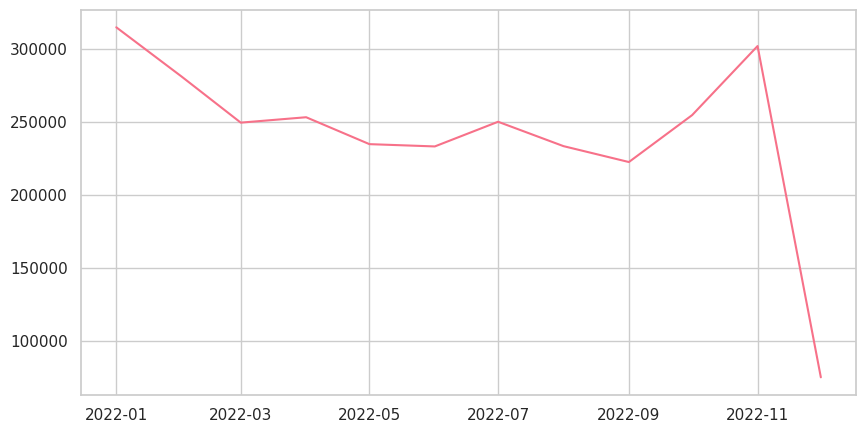

In [ ]:
predict_future('India', 'Clients')

**PART 4**

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Define the control and treatment groups
control = pivoted_data[pivoted_data['Segment'] == 'Clients']['Lv5/Lv1']
treatment = pivoted_data[pivoted_data['Segment'] == 'Customers']['Lv5/Lv1']

# Calculate the mean and standard deviation of each group
control_mean = np.mean(control)
treatment_mean = np.mean(treatment)
control_std = np.std(control)
treatment_std = np.std(treatment)

# Calculate the standard error of the difference between means
n_control = len(control)
n_treatment = len(treatment)
se_diff = np.sqrt((control_std**2/n_control) + (treatment_std**2/n_treatment))

# Calculate the t-statistic and p-value
t_statistic = (treatment_mean - control_mean) / se_diff
p_value = ttest_ind(treatment, control, equal_var=False).pvalue

# Print the results
print("Control group mean:", control_mean)
print("Treatment group mean:", treatment_mean)
print("Control group standard deviation:", control_std)
print("Treatment group standard deviation:", treatment_std)
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Control group mean: 0.09077155346676583
Treatment group mean: 0.09519606915730666
Control group standard deviation: 0.021619149598510582
Treatment group standard deviation: 0.05088905509177672
t-statistic: 1.05604939235126
p-value: 0.2934870690248029
